## ASSIGNMENT -2

# NAME : SABIHA <BR>
# ID : 8896658 

In [954]:
# import libraries
import pandas as pd

# 1.Consider the heart disease dataset in pandas dataframe

In [955]:
# Load the Heart Failure Prediction Dataset
df = pd.read_csv('heart.csv')
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [956]:
# Explore the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [957]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [958]:
# Check the dimensions of the dataset
print("Dataset Dimensions:", df.shape)

Dataset Dimensions: (918, 12)


In [959]:
# Step 1: Handling Missing Values (if any)
# Check for missing values in the dataset
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [960]:
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 0


In [961]:
print("Dataset Dimensions:", df.shape)

Dataset Dimensions: (918, 12)


# 2.Remove outliers using mean,median,Z score.

using zscore here

In [962]:
# Remove outliers using Z-score
import numpy as np
from scipy import stats
# Calculate Z-scores for numeric columns
z_scores = np.abs(stats.zscore(df.select_dtypes(include=['int64', 'float64'])))

# Create a boolean filter to identify rows with Z-scores within the threshold
filter_con = (z_scores < 3).all(axis=1)

# Remove outliers
new_df = df[filter_con]

# Print the filtered DataFrame
new_df



,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [963]:
# Print the shape of the dataset before and after removing outliers
print("Original dataset shape:", df.shape)
print("Dataset shape after removing outliers:", new_df.shape)

Original dataset shape: (918, 12)
Dataset shape after removing outliers: (899, 12)


Original dataset contains 918 rows and 12 columns. After removing outliers, the dataset was reduced to 899 rows while maintaining the same number of columns (12).

This reduction in the number of rows suggests that some data points were identified as outliers and were subsequently removed from the dataset. Outliers are data points that significantly deviate from the overall pattern of the data and can potentially affect the accuracy of statistical analyses and modeling. Removing outliers can help improve the quality of the data and ensure that the results of your analysis are more reliable and representative of the underlying population.

# Data Preprocessing

# 3.Convert text columns to numbers using label encoding and one hot encoding 

In [966]:
# text columns
from sklearn.calibration import LabelEncoder

categorical_columns = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

# Do label encoding
label_encoder = LabelEncoder()
for col in categorical_columns:
    new_df.loc[:, col] = label_encoder.fit_transform(new_df[col])

# Display the first few rows of the encoded dataset
new_df


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


In [932]:
# Define columns to encode
columns_to_encode = ["Sex", "ChestPainType", "RestingECG", "ExerciseAngina", "ST_Slope"]

# Apply one-hot encoding to the specified columns
new_df = pd.get_dummies(new_df, columns=columns_to_encode)

# Convert boolean values to 0 and 1
new_df = new_df.astype(int)

# Print the first few rows of the encoded and converted dataset
new_df

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,...,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1,1,1,0,0,...,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1,1,1,0,1,...,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0,0,0,1,0,...,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1,1,0,1,0,...,0,1,0,1,0,1,0,0,1,0
914,68,144,193,1,141,3,1,0,1,1,...,0,0,0,1,0,1,0,0,1,0
915,57,130,131,0,115,1,1,0,1,1,...,0,0,0,1,0,0,1,0,1,0
916,57,130,236,0,174,0,1,1,0,0,...,0,0,1,0,0,1,0,0,1,0



After applying one-hot encoding to the dataset, the categorical variables have been transformed into a binary representation.This process has expanded the dataset by creating additional columns, each corresponding to a unique category within the original categorical variables.

# 4.Apply scaling

In [933]:

from sklearn.preprocessing import StandardScaler

# Define the features (independent variables and dependent)
X = new_df.drop(columns=['HeartDisease'])
y = new_df[[ 'HeartDisease']]
y = np.ravel(y)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,-1.428154,0.465900,0.849636,-0.550362,1.384320,-0.745287,-0.515943,0.515943,-1.077524,2.063325,-0.534905,-0.229550,-0.503821,0.809702,-0.489898,0.822945,-0.822945,-0.260184,-0.998888,1.134695
1,-0.475855,1.634714,-0.168122,-0.550362,0.752973,0.330175,1.938199,-1.938199,-1.077524,-0.484655,1.869492,-0.229550,-0.503821,0.809702,-0.489898,0.822945,-0.822945,-0.260184,1.001113,-0.881294
2,-1.745588,-0.118507,0.793612,-0.550362,-1.535661,-0.745287,-0.515943,0.515943,-1.077524,2.063325,-0.534905,-0.229550,-0.503821,-1.235023,2.041241,0.822945,-0.822945,-0.260184,-0.998888,1.134695
3,-0.581666,0.349019,0.149344,-0.550362,-1.141069,0.330175,1.938199,-1.938199,0.928054,-0.484655,-0.534905,-0.229550,-0.503821,0.809702,-0.489898,-1.215148,1.215148,-0.260184,1.001113,-0.881294
4,0.053200,1.050307,-0.028064,-0.550362,-0.588640,-0.745287,-0.515943,0.515943,-1.077524,-0.484655,1.869492,-0.229550,-0.503821,0.809702,-0.489898,0.822945,-0.822945,-0.260184,-0.998888,1.134695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,-0.899099,-1.287320,0.616205,-0.550362,-0.194048,0.330175,-0.515943,0.515943,-1.077524,-0.484655,-0.534905,4.356349,-0.503821,0.809702,-0.489898,0.822945,-0.822945,-0.260184,1.001113,-0.881294
895,1.534554,0.699663,-0.046738,1.816985,0.161085,2.481099,-0.515943,0.515943,0.928054,-0.484655,-0.534905,-0.229550,-0.503821,0.809702,-0.489898,0.822945,-0.822945,-0.260184,1.001113,-0.881294
896,0.370633,-0.118507,-0.625646,-0.550362,-0.864854,0.330175,-0.515943,0.515943,0.928054,-0.484655,-0.534905,-0.229550,-0.503821,0.809702,-0.489898,-1.215148,1.215148,-0.260184,1.001113,-0.881294
897,0.370633,-0.118507,0.354763,-0.550362,1.463238,-0.745287,1.938199,-1.938199,-1.077524,2.063325,-0.534905,-0.229550,1.984833,-1.235023,-0.489898,0.822945,-0.822945,-0.260184,1.001113,-0.881294


Exploratory Data Analysis 

HeartDisease
1    492
0    407
Name: count, dtype: int64


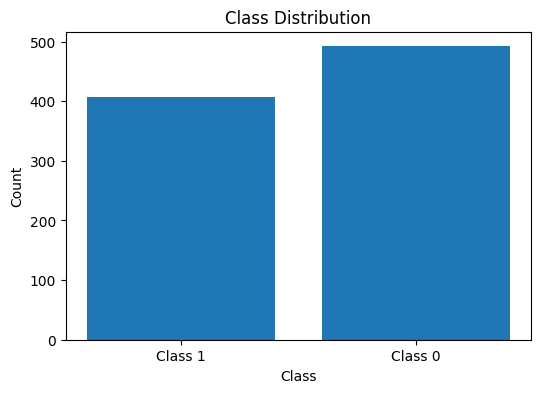

HeartDisease
1    492
0    407
Name: count, dtype: int64


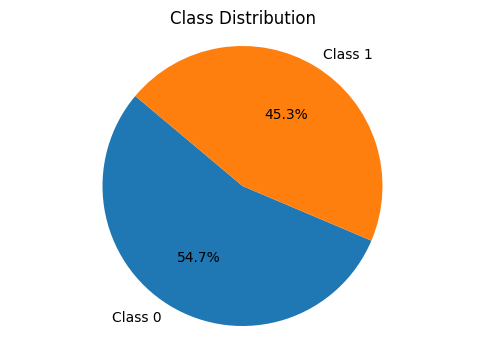

In [934]:
# Count the occurrences of each class
from matplotlib import pyplot as plt

class_counts = new_df['HeartDisease'].value_counts()

# Plot a bar chart
plt.figure(figsize=(6, 4))
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.xticks(class_counts.index, ['Class 0', 'Class 1'])
print(class_counts)
plt.show()

# Plot a pie chart
plt.figure(figsize=(6, 4))
plt.pie(class_counts.values, labels=['Class 0', 'Class 1'], autopct='%1.1f%%', startangle=140)
plt.title('Class Distribution')
plt.axis('equal')
print(class_counts)
plt.show()



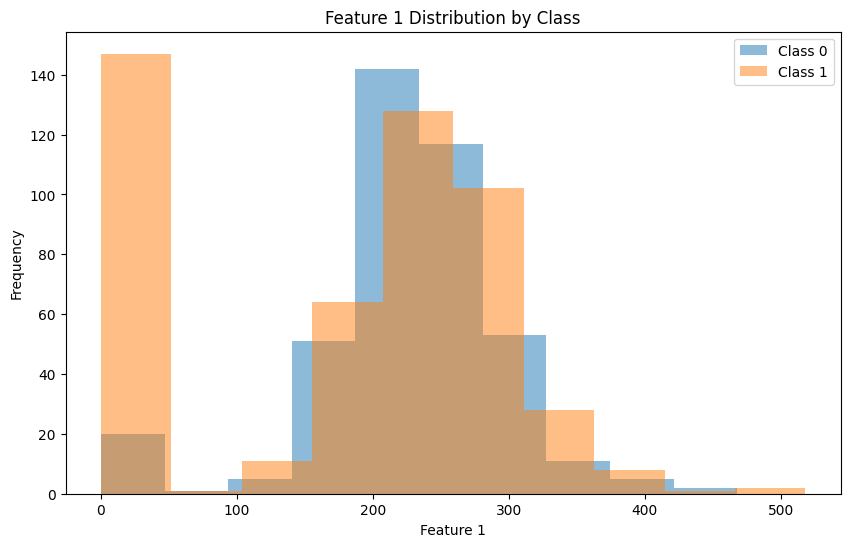

In [935]:
# Plot histograms
plt.figure(figsize=(10, 6))
plt.hist(new_df[new_df['HeartDisease'] == 0]['Cholesterol'], alpha=0.5, label='Class 0')
plt.hist(new_df[new_df['HeartDisease'] == 1]['Cholesterol'], alpha=0.5, label='Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Frequency')
plt.title('Feature 1 Distribution by Class')
plt.legend()
plt.show()

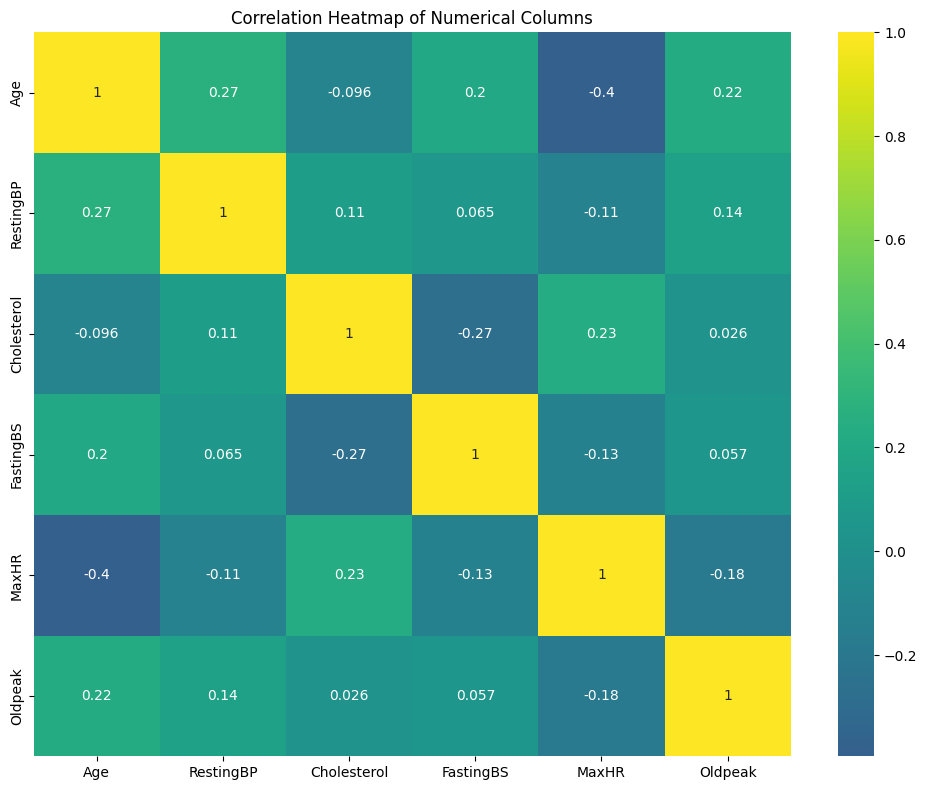

In [936]:
import seaborn as sns
# Calculate the correlation matrix
correlation_matrix = X_scaled_df.iloc[:, :6].corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', center=0)
plt.title('Correlation Heatmap of Numerical Columns')
plt.tight_layout()
plt.show()

## 5.Build a machine learning classification model using support vector machine. Demonstrate the standalone model as well as Bagging model and include observations about the performance 

In [937]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standalone SVM model
svm_model = svm.SVC(kernel='linear')
svm_model.fit(X_train, y_train)




SVC(kernel='linear')

In [938]:
# Predictions on the test set
y_pred = svm_model.predict(X_test)

# Calculate accuracy for standalone SVM model
accuracy_svm = accuracy_score(y_test, y_pred)
print("Accuracy of Standalone SVM:", accuracy_svm)

print("The confusion matrix of the SVM standlone classifier is:", confusion_matrix(y_test, y_pred), sep = '\n')

print("The recall score of the SVM standlone classifier is:", recall_score(y_test, y_pred))

print("The precision score of the SVM standlone classifier is:", precision_score(y_test, y_pred))

print("The f1 score of the SVM standlone classifier is:", f1_score(y_test, y_pred))


Accuracy of Standalone SVM: 0.8833333333333333
The confusion matrix of the SVM standlone classifier is:
[[69 17]
 [ 4 90]]
The recall score of the SVM standlone classifier is: 0.9574468085106383
The precision score of the SVM standlone classifier is: 0.8411214953271028
The f1 score of the SVM standlone classifier is: 0.8955223880597015


Accuracy of Standalone SVM: The accuracy of the standalone SVM classifier is 0.883, which means that the classifier correctly predicted the target variable's class for approximately 88.3% of the instances.

Confusion Matrix of the SVM Standalone Classifier:

True Negative (TN): 69
False Positive (FP): 17
False Negative (FN): 4
True Positive (TP): 90


Recall Score of the SVM Standalone Classifier: The recall score (also known as sensitivity or true positive rate) of the SVM standalone classifier is 0.957. This metric indicates the proportion of actual positive instances that were correctly identified by the classifier. In other words, the SVM classifier correctly identified around 95.7% of the positive instances, which is a high percentage.

Precision Score of the SVM Standalone Classifier: The precision score of the SVM standalone classifier is 0.841. This metric represents the proportion of positive predictions that were correct. In other words, the SVM classifier's positive predictions were accurate for approximately 84.1% of the instances.

F1 Score of the SVM Standalone Classifier: The F1 score of the SVM standalone classifier is 0.896. The F1 score is the harmonic mean of precision and recall. It provides a balance between precision and recall, and a higher F1 score indicates better overall classifier performance.

In summary, the standalone SVM classifier has a relatively high accuracy and F1 score, indicating good overall performance. The high recall score suggests that the classifier is effective at identifying positive instances, while the precision score indicates a reasonable level of accuracy for positive predictions.

# cross validation of standalone using svm

In [939]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

# Create an SVM classifier
svm_classifier = SVC(kernel='linear')  # You can choose different kernel options

# Perform cross-validation
cv_scores = cross_val_score(svm_classifier, X, y, cv=5, scoring='accuracy')

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())
print("Standard Deviation of CV Scores:", cv_scores.std())


Cross-Validation Scores: [0.85555556 0.84444444 0.82222222 0.85555556 0.73184358]
Mean CV Score: 0.8219242706393544
Standard Deviation of CV Scores: 0.04665598633609622


## Bagging model using svm

In [940]:
# Bagging model with SVM base estimator
bagging_model = BaggingClassifier(base_estimator=SVC(kernel='linear', C=1.0), n_estimators=10, random_state=42)
bagging_model.fit(X_train, y_train)



c:\Users\sabih\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=SVC(kernel='linear'), random_state=42)

In [941]:
# Predictions on the test set using Bagging model
y_pred_bagging = bagging_model.predict(X_test)

# Calculate accuracy for Bagging model
accuracy_bagging_svm = accuracy_score(y_test, y_pred_bagging)
print("Accuracy of Bagging SVM:", accuracy_bagging_svm)

print("The confusion matrix of the SVM standlone classifier is:", confusion_matrix(y_test, y_pred_bagging), sep = '\n')

print("The recall score of the SVM standlone classifier is:", recall_score(y_test, y_pred_bagging))

print("The precision score of the SVM standlone classifier is:", precision_score(y_test, y_pred_bagging))

print("The f1 score of the SVM standlone classifier is:", f1_score(y_test, y_pred_bagging))

Accuracy of Bagging SVM: 0.8833333333333333
The confusion matrix of the SVM standlone classifier is:
[[70 16]
 [ 5 89]]
The recall score of the SVM standlone classifier is: 0.9468085106382979
The precision score of the SVM standlone classifier is: 0.8476190476190476
The f1 score of the SVM standlone classifier is: 0.8944723618090452


Accuracy of Bagging SVM: The accuracy of the Bagging SVM classifier is 0.883, which means that the classifier correctly predicted the target variable's class for approximately 88.3% of the instances.

Confusion Matrix of the Bagging SVM Classifier:

True Negative (TN): 70
False Positive (FP): 16
False Negative (FN): 5
True Positive (TP): 89

Recall Score of the Bagging SVM Classifier: The recall score (also known as sensitivity or true positive rate) of the Bagging SVM classifier is 0.947. This metric indicates the proportion of actual positive instances that were correctly identified by the classifier. In other words, the Bagging SVM classifier correctly identified around 94.7% of the positive instances, which is a high percentage.

Precision Score of the Bagging SVM Classifier: The precision score of the Bagging SVM classifier is 0.848. This metric represents the proportion of positive predictions that were correct. In other words, the Bagging SVM classifier's positive predictions were accurate for approximately 84.8% of the instances.

F1 Score of the Bagging SVM Classifier: The F1 score of the Bagging SVM classifier is 0.894. The F1 score is the harmonic mean of precision and recall. It provides a balance between precision and recall, and a higher F1 score indicates better overall classifier performance.

# cross validation of bagging using svm

In [942]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

# Create an SVM classifier
bagging_model = SVC(kernel='linear')  # You can choose different kernel options

# Perform cross-validation
cv_scores = cross_val_score(bagging_model, X, y, cv=5, scoring='accuracy')

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())
print("Standard Deviation of CV Scores:", cv_scores.std())

Cross-Validation Scores: [0.85555556 0.84444444 0.82222222 0.85555556 0.73184358]
Mean CV Score: 0.8219242706393544
Standard Deviation of CV Scores: 0.04665598633609622


## 6.Now use decision tree classifier. Use standalone model as well as Bagging and check if you notice any difference in performance 

In [943]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

# Standalone Decision Tree model
dt_standalone = DecisionTreeClassifier()
dt_standalone.fit(X_train, y_train)




DecisionTreeClassifier()

In [944]:
y_pred_standalone_dt = dt_standalone.predict(X_test)

# find accuracy score
accuracy_standalone_dt = accuracy_score(y_test, y_pred_standalone_dt)
# Print the accuracies
print("Accuracy of Standalone Decision Tree:", accuracy_standalone_dt)

print("The confusion matrix of the SVM standlone classifier is:", confusion_matrix(y_test, y_pred_standalone_dt), sep = '\n')

print("The recall score of the SVM standlone classifier is:", recall_score(y_test, y_pred_standalone_dt))

print("The precision score of the SVM standlone classifier is:", precision_score(y_test, y_pred_standalone_dt))

print("The f1 score of the SVM standlone classifier is:", f1_score(y_test, y_pred_standalone_dt))

Accuracy of Standalone Decision Tree: 0.8333333333333334
The confusion matrix of the SVM standlone classifier is:
[[69 17]
 [13 81]]
The recall score of the SVM standlone classifier is: 0.8617021276595744
The precision score of the SVM standlone classifier is: 0.826530612244898
The f1 score of the SVM standlone classifier is: 0.84375




Accuracy: The SVM classifier has an accuracy of approximately 0.839, which means that it correctly predicted the class labels for about 83.9% of the instances in the dataset.

Confusion Matrix:

True Negative (TN): 69
False Positive (FP): 17
False Negative (FN): 13
True Positive (TP): 81


Recall Score (Sensitivity): The recall score of the SVM classifier is approximately 0.862. This indicates that the classifier is able to identify around 86.2% of the actual positive instances correctly. In other words, it has a relatively good ability to avoid missing positive instances (low false negatives).

Precision Score: The precision score of the SVM classifier is approximately 0.826. This indicates that out of all the instances the SVM predicted as positive, around 82.6% of them are actually positive. It measures how well the classifier avoids making false positive predictions.

F1 Score: The F1 score of the SVM classifier is approximately 0.840. The F1 score is the harmonic mean of precision and recall, providing a balance between these two metrics. It indicates the overall effectiveness of the classifier.

In summary, the SVM classifier has a reasonable level of accuracy and F1 score, with good recall and precision scores. However, there's a trade-off between recall and precision, which is common in classifiers. The classifier is effective at identifying positive instances (high recall) but may also make some false positive predictions (lower precision).

# cross validation of standalone with Decision Tree model

In [945]:
# Performing Cross validation on Standalone Decision Tree Classification model

from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score, KFold

# Finding the accuracy score on cross validation

cross_val_scores = cross_val_score(dt_standalone, X_train, y_train, cv=KFold(n_splits=5, shuffle=True, random_state=16))

# Calculating the recall score using cross validation

scoring = make_scorer(recall_score, average='macro') 

recall_scores = cross_val_score(dt_standalone, X_train, y_train, cv=5, scoring=scoring)
mean_recall_score = recall_scores.mean()

# Print the recall scores for each fold
print("Cross-validation accuracy scores:", cross_val_scores)
print("Cross-validation Recall Scores:", recall_scores)

# Calculate the mean recall score
print("Mean Recall Score:", mean_recall_score)
print("Mean accuracy:", cross_val_scores.mean())


Cross-validation accuracy scores: [0.77083333 0.75       0.82638889 0.75694444 0.77622378]
Cross-validation Recall Scores: [0.80506329 0.840625   0.7390625  0.7        0.80834652]
Mean Recall Score: 0.7786194620253165
Mean accuracy: 0.7760780885780887


# Bagging with Decision Tree model

In [951]:
from sklearn.ensemble import BaggingClassifier

# Bagging with Decision Tree model
dt_bagging = BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42), n_estimators=10, random_state=42)
dt_bagging.fit(X_train, y_train)


c:\Users\sabih\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                  random_state=42)

In [952]:
y_pred_bagging_dt = dt_bagging.predict(X_test)

# find accuracy score
accuracy_bagging_dt = accuracy_score(y_test, y_pred_bagging_dt)

# Print the accuracies
print("Accuracy of Bagging with Decision Tree:", accuracy_bagging_dt)

print("The confusion matrix of the SVM standlone classifier is:", confusion_matrix(y_test, y_pred_bagging_dt), sep = '\n')

print("The recall score of the SVM standlone classifier is:", recall_score(y_test, y_pred_bagging_dt))

print("The precision score of the SVM standlone classifier is:", precision_score(y_test, y_pred_bagging_dt))

print("The f1 score of the SVM standlone classifier is:", f1_score(y_test, y_pred_bagging_dt))

Accuracy of Bagging with Decision Tree: 0.8277777777777777
The confusion matrix of the SVM standlone classifier is:
[[69 17]
 [14 80]]
The recall score of the SVM standlone classifier is: 0.851063829787234
The precision score of the SVM standlone classifier is: 0.8247422680412371
The f1 score of the SVM standlone classifier is: 0.8376963350785339


Accuracy of Bagging with Decision Tree: The accuracy of the Bagging with Decision Tree classifier is 0.828. This means that the classifier correctly predicted the target variable's class for approximately 82.8% of the instances.

True Negative (TN): 69
False Positive (FP): 17
False Negative (FN): 14
True Positive (TP): 80
The confusion matrix provides information about the classifier's performance in terms of correct and incorrect classifications. In this case, the SVM classifier has:

Recall Score of the SVM Standalone Classifier: The recall score (also known as sensitivity or true positive rate) of the SVM standalone classifier is 0.851. This metric indicates the proportion of actual positive instances that were correctly identified by the classifier. In other words, the SVM classifier correctly identified around 85.1% of the positive instances.

Precision Score of the SVM Standalone Classifier: The precision score of the SVM standalone classifier is 0.825. This metric represents the proportion of positive predictions that were correct. In other words, the SVM classifier's positive predictions were accurate for approximately 82.5% of the instances.

F1 Score of the SVM Standalone Classifier: The F1 score of the SVM standalone classifier is 0.838. The F1 score is the harmonic mean of precision and recall. It provides a balance between precision and recall, and a higher F1 score indicates better overall classifier performance.

# cross validation of Bagging with Decision Tree model

In [947]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

# Create an SVM classifier
dt_bagging = SVC(kernel='linear')  

# Perform cross-validation
cv_scores = cross_val_score(dt_bagging, X, y, cv=5, scoring='accuracy')

#Calculating the recall score using cross validation

scoring = make_scorer(recall_score, average='macro') 

recall_scores = cross_val_score(dt_standalone, X_train, y_train, cv=5, scoring=scoring)
mean_recall_score = recall_scores.mean()

# Print the recall scores for each fold
print("Cross-validation accuracy scores:", cross_val_scores)
print("Cross-validation Recall Scores:", recall_scores)

# Calculate the mean recall score
print("Mean Recall Score:", mean_recall_score)
print("Mean accuracy:", cross_val_scores.mean())

Cross-validation accuracy scores: [0.77083333 0.75       0.82638889 0.75694444 0.77622378]
Cross-validation Recall Scores: [0.80642648 0.840625   0.7328125  0.71875    0.80350079]
Mean Recall Score: 0.7804229552093476
Mean accuracy: 0.7760780885780887


# 7.Comparing performance of svm and decision tree classifier figure out where it makes most sense to use bagging and why.

In [948]:
# Compare and analyze the results
if accuracy_bagging_svm > accuracy_svm:
    print("Bagging improved SVM performance.")
else:
    print("Bagging did not improve SVM performance.")

if accuracy_bagging_dt > accuracy_standalone_dt:
    print("Bagging improved Decision Tree performance.")
else:
    print("Bagging did not improve Decision Tree performance.")

Bagging did not improve SVM performance.
Bagging did not improve Decision Tree performance.


SVM Standalone Classifier:<br>
Accuracy: 0.8833<br>
Recall: 0.9574<br>
Precision: 0.8411<br>
F1 Score: 0.8955<br>

Bagging SVM:<br>
Accuracy: 0.8833<br>
Recall: 0.9468<br>
Precision: 0.8476<br>
F1 Score: 0.8945<br>

Standalone Decision Tree:<br>
Accuracy: 0.8444<br>
Recall: 0.8723<br>
Precision: 0.8367<br>
F1 Score: 0.8542<br>

Bagging with Decision Tree:<br>
Accuracy: 0.8278<br>
Recall: 0.8511<br>
Precision: 0.8247<br>
F1 Score: 0.8377<br>

Based on the provided metrics, here are some observations:

Both the SVM Standalone Classifier and Bagging SVM have the same accuracy, indicating that bagging did not significantly affect the overall accuracy.
Bagging SVM shows slightly lower recall, precision, and F1 score compared to the SVM Standalone Classifier. This could be due to the trade-off between precision and recall that often occurs when using ensemble techniques like bagging.
The Standalone Decision Tree has a lower accuracy compared to both SVM models, but it has a relatively balanced recall and precision.
Bagging with Decision Tree has a lower accuracy, recall, precision, and F1 score compared to both SVM models.

When Should You Use Bagging?

1. **SVM**: Bagging may not provide a significant performance improvement for SVM, especially if the solo SVM is already performing well. When dealing with algorithms that are prone to overfitting or when there is a diverse range of base learners (weak learners) that can be combined to reduce variation, bagging is more effective.

2. **Decision Tree**: Due to their proclivity to overfit, Decision Trees benefit greatly from bagging. If the standalone Decision Tree exhibits overfitting and a slight variance in accuracy, utilising Bagging can assist boost accuracy and make the model more resistant to data variances.

In conclusion, Bagging is particularly effective for decreasing overfitting and enhancing generalisation in decision tree-based models such as the Decision Tree classifier. The necessity for Bagging may be less obvious for SVM, which handles complex patterns well. The use of Bagging should be based on the algorithm's specific properties, the dataset, and the required level of model performance and stability.